# Evalution and Analysis

## Imports:

In [1]:
from pathlib import Path
from Helper.evaluation_helpers import get_predictions, calc_metrics, error_plot
import warnings
from matplotlib import pyplot as plt

### Supress warnings

In [2]:
warnings.filterwarnings("ignore") 

In [3]:
import numpy as np
from pathlib import Path

predsPath = Path('../Predictions/')
for i in list(predsPath.glob('*.npy')):
    data = np.load(i)
    print(f" {i.name} has {len(data)} values")  # Show length of each prediction file


 ARDL.npy has 12 values
 ARIMA1990.npy has 12 values
 ARIMA2000.npy has 12 values
 ARIMAX1990.npy has 12 values
 ARIMAX2000.npy has 12 values
 GRU.npy has 48 values
 LSTM.npy has 12 values
 MLR.npy has 48 values
 Naive.npy has 48 values
 NBEATSx.npy has 12 values
 NHITS.npy has 12 values
 Random_Forest_X.npy has 12 values
 SARIMA1990.npy has 12 values
 SARIMA2000.npy has 12 values
 SARIMAX1990.npy has 12 values
 SARIMAX2000.npy has 12 values
 Tide.npy has 12 values
 VAR.npy has 12 values


In [4]:
# metric DataFrames are sorted by the main metric before being displayed
main_metric = 'RMSE'

# Horizon = 1:

,ground_truth,ARIMA1990
observation_date,,
01/2024,122.115,121.865489
02/2024,122.494,122.135733
03/2024,122.912,122.405977
04/2024,123.234,122.676221
05/2024,123.224,122.946465
06/2024,123.369,123.216709
07/2024,123.575,123.486953
08/2024,123.727,123.757197
09/2024,123.939,124.027441


,RMSE,MAE,r2
ARIMA1990,0.278222,0.22374,0.856396


2025-04-18 12:24:16,718 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-18 12:24:16,723 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


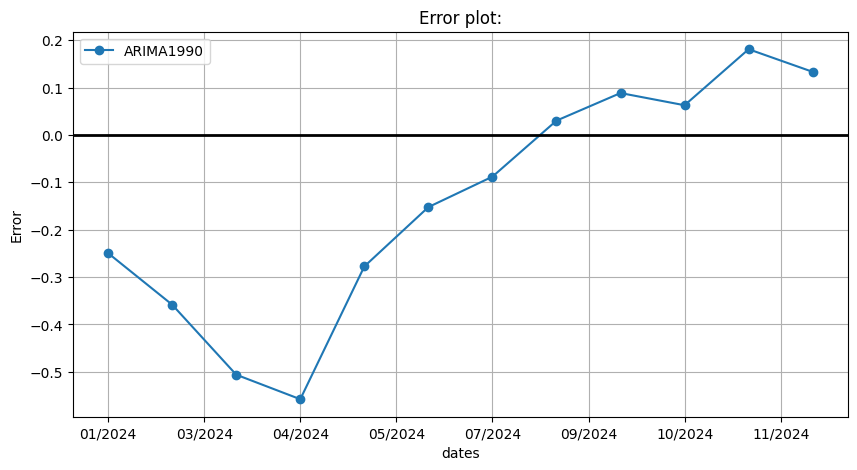

In [5]:
predsPath= Path('../Predictions/Horizon1')
predsDf=get_predictions(predsPath)
display(predsDf)

metrics_1= calc_metrics(predsDf)
display(metrics_1.sort_values(main_metric, axis=0))

error_plot(predsDf,model='all')

# Horizon = 3:

In [6]:
predsPath= Path('../Predictions/Horizon3')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,ARIMA1990
observation_date,,
01/2024,122.115,121.865489
02/2024,122.494,122.135733
03/2024,122.912,122.405977
04/2024,123.234,122.676221
05/2024,123.224,122.946465
06/2024,123.369,123.216709
07/2024,123.575,123.486953
08/2024,123.727,123.757197
09/2024,123.939,124.027441


# Horizon = 6:

In [7]:
predsPath= Path('../Predictions/Horizon6')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,ARIMA1990
observation_date,,
01/2024,122.115,121.865489
02/2024,122.494,122.135733
03/2024,122.912,122.405977
04/2024,123.234,122.676221
05/2024,123.224,122.946465
06/2024,123.369,123.216709
07/2024,123.575,123.486953
08/2024,123.727,123.757197
09/2024,123.939,124.027441


# Horizon = 12:

In [8]:
predsPath= Path('../Predictions/Horizon12')
predsDf=get_predictions(predsPath)
display(predsDf)

,ground_truth,ARIMA1990
observation_date,,
01/2024,122.115,121.865489
02/2024,122.494,122.135733
03/2024,122.912,122.405977
04/2024,123.234,122.676221
05/2024,123.224,122.946465
06/2024,123.369,123.216709
07/2024,123.575,123.486953
08/2024,123.727,123.757197
09/2024,123.939,124.027441


# Analysis:

2025-04-18 12:24:17,052 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-18 12:24:17,055 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-18 12:24:17,058 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-04-18 12:24:17,059 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


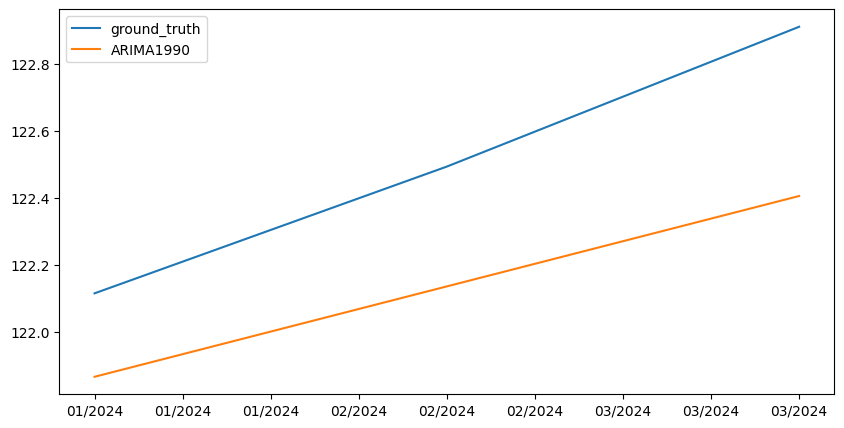

In [9]:
from matplotlib import pyplot as plt

plt.figure(figsize=(10, 5))
ax = plt.axes()
ax.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.locator_params(axis='x', nbins=10)

for model in predsDf.columns:
    plt.plot(predsDf.index[:int(len(predsDf)/4)], predsDf[model][:int(len(predsDf)/4)])

plt.legend(predsDf.columns)
plt.show()